In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [2]:
from algo_evaluation.datasets import *

In [3]:
higgs_data = load_higgs_train(sample_size=10000)
features, weights, labels = higgs_data
print 'Size of the dataset:', features.shape[0]
print 'Number of features:', features.shape[1]
print 'Number of positives (signal):', labels.value_counts()['s']
print 'Number of negatives (background):', labels.value_counts()['b']

Size of the dataset: 2768
Number of features: 13
Number of positives (signal): 1270
Number of negatives (background): 1498


In [4]:
from algo_evaluation.optimization import hill_climbing as hc

In [5]:
max_depth = (10, 100)
min_samples_split = (2, 50)

In [6]:
domain = [max_depth, min_samples_split]
print domain

[(10, 100), (2, 50)]


In [7]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, features, labels, cv=10)
mean_score = scores.mean()
print mean_score

0.750732485743


In [25]:
def compute_classification_error(solution):
    md, ms = solution
    clf = DecisionTreeClassifier(max_depth=md, min_samples_split=ms)
    scores = cross_val_score(clf, features, labels, cv=10)
    mean_score = scores.mean()
    std_score = scores.std()
    return mean_score

In [26]:
df = hc.hillclimb(domain, compute_classification_error, max_evaluations=1000)

ValueError: min_samples_split must be greater than zero.

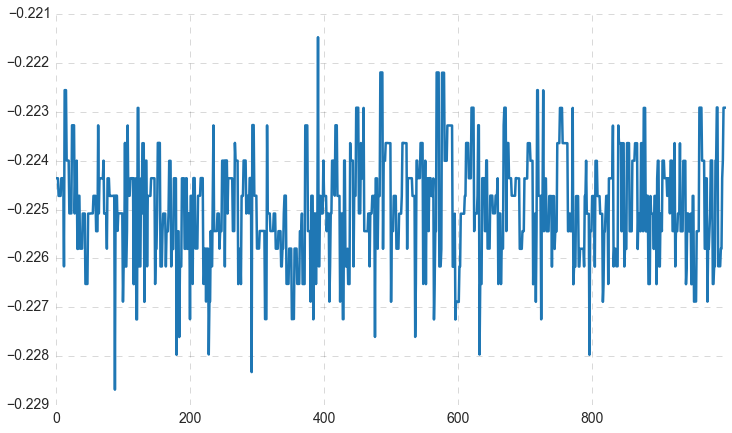

In [24]:
df.optimal_value.plot()

In [10]:
df.cost.plot()

AttributeError: 'DataFrame' object has no attribute 'cost'

In [ ]:
from algo_evaluation.optimization.problems import hyper_optimization

In [ ]:
rhc_df, sa_df = hyper_optimization.compare_all((features, labels))

In [ ]:
domain

In [ ]:
from algo_evaluation.optimization.mimic import Mimic

In [ ]:
m = Mimic(domain, compute_classification_error)

In [ ]:
m.fit()

In [19]:
import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
tips = sns.load_dataset("tips")

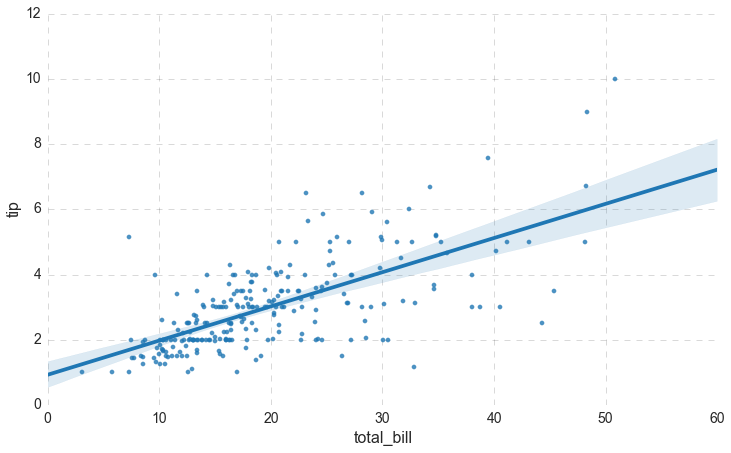

In [20]:
sns.regplot("total_bill", "tip", tips);